# Prosumer Feature Review and Evaluation

In [0]:
import re
userName = spark.sql("SELECT CURRENT_USER").collect()[0]['current_user()']
userName0 = userName.split("@")[0]
userName0 = re.sub(r"[!#$%&'*+/=?^`{}|.\\-]+", '_', userName0)
userName1 = userName.split("@")[1]
userName = f'{userName0}@{userName1}'
userNameReg = re.sub(r'[@\.]', '_', userName)

#Needed for MLFlow and Serverless
import os
os.environ['SPARKML_TEMP_DFS_PATH'] = '/Volumes/cscie103_catalog_final/gold/data'
os.environ['MLFLOW_DFS_TMP'] = '/Volumes/cscie103_catalog_final/gold/data'

spark.sql('CREATE CATALOG IF NOT EXISTS cscie103_catalog_final');
spark.sql('USE CATALOG cscie103_catalog_final')

spark.sql('CREATE SCHEMA IF NOT EXISTS gold');
spark.sql('USE cscie103_catalog_final.gold')

spark.sql(f'CREATE VOLUME if not exists cscie103_catalog_final.gold.data')

userDir = f"/Volumes/cscie103_catalog_final/gold/data"
data_path_json = f"/Volumes/cscie103_catalog_final/gold/data/json"
data_path_csv = f"/Volumes/cscie103_catalog_final/gold/data/csv"
data_path = data_path_csv
dbutils.fs.mkdirs(f"{data_path}")
dbutils.fs.rm('/Volumes/cscie103_catalog_final/gold/data/checkpoint', True)
spark.sql('DROP TABLE IF EXISTS cscie103_catalog_final.gold.streaming_predictions_tbl')

print('UserDir ' + userDir)
print('userName '+ userName)
print('Database gold')

spark.sql(f"use cscie103_catalog_final.gold")

UserDir /Volumes/cscie103_catalog_final/gold/data
userName lil658@g.harvard.edu
Database gold


DataFrame[]

## Read Prosumer Features Dataset

In [0]:
# Load our features dataset

df = spark.table(f"cscie103_catalog_final.gold.county_energy_weather_4hours_mv")
df = df.repartition(16)

display(df)

county_id county_name longitude latitude data_block_id wh_observ_date wh_observ_4hour wh_temperature wh_dewpoint wh_snowfall wh_surface_pressure wh_cloudcover_total wh_cloudcover_low wh_cloudcover_mid wh_cloudcover_high wh_windspeed_10m wh_winddirection_10m wh_shortwave_radiation wh_direct_solar_radiation wh_diffuse_radiation wf_temperature wf_dewpoint wf_cloudcover_total wf_cloudcover_low wf_cloudcover_mid wf_cloudcover_high wf_10_metre_u_wind_component wf_10_metre_v_wind_component wf_direct_solar_radiation wf_surface_solar_radiation_downwards wf_snowfall wf_total_precipitation is_business is_consumption product_type_id product_type installed_capacity eic_count target euros_per_mwh highest_price_per_mwh lowest_price_per_mwh datetime t_observ_date t_observ_4hour c_observ_date gp_forecast_date gp_origin_date ep_forecast_date ep_origin_date row_id prediction_unit_id 0 HARJUMAA 24.866666666666664 59.29999999999998 2 2021-09-01 2 14.016666666666667 8.616666666666665 0.0 1007.0666666666667 27.166666666666668 18.666666666666668 16.666666666666668 2.3333333333333335 6.291666666666667 326.1666666666667 466.1666666666667 342.8333333333333 123.33333333333333 12.14154968261721 5.020776367187523 0.33051591614882153 0.2256238510211309 0.18133333449562392 0.037709554036458336 3.1275614798069 -5.473141988118489 621.2525462962964 458.36379629629636 0.0 4.641626340647539E-5 false true 3 Spot 7207.88 688 310.078 118.92 46.29 45.62 2021-09-03T10:00:00.000Z 2021-09-03 2 2021-09-01 2021-09-02 2021-09-01 2021-09-02T10:00:00.000Z 2021-09-01T10:00:00.000Z 7081 2 0 HARJUMAA 24.866666666666664 59.29999999999998 2 2021-09-01 3 14.312499999999998 7.074999999999999 0.0 1006.8333333333331 35.833333333333336 15.625 36.166666666666664 0.0 6.635416666666667 323.5416666666667 481.5416666666667 358.5 123.04166666666667 12.854876454671247 3.969875590006533 0.7199939535929237 0.5246052625261655 0.5122200982902237 0.2787424723307292 3.974174323181311 -5.0827367305755615 417.3700925925925 406.8222569444444 0.0 1.3905722880735993E-5 false false 2 General service 166.4 17 77.51 97.97 46.29 45.62 2021-09-03T14:00:00.000Z 2021-09-03 3 2021-09-01 2021-09-02 2021-09-01 2021-09-02T14:00:00.000Z 2021-09-01T14:00:00.000Z 7566 1 0 HARJUMAA 24.866666666666664 59.29999999999998 2 2021-09-01 3 14.312499999999998 7.074999999999999 0.0 1006.8333333333331 35.833333333333336 15.625 36.166666666666664 0.0 6.635416666666667 323.5416666666667 481.5416666666667 358.5 123.04166666666667 12.854876454671247 3.969875590006533 0.7199939535929237 0.5246052625261655 0.5122200982902237 0.2787424723307292 3.974174323181311 -5.0827367305755615 417.3700925925925 406.8222569444444 0.0 1.3905722880735993E-5 true true 0 Combined 400.0 5 39.0 105.05 46.29 45.62 2021-09-03T15:00:00.000Z 2021-09-03 3 2021-09-01 2021-09-02 2021-09-01 2021-09-02T15:00:00.000Z 2021-09-01T15:00:00.000Z 7693 3 0 HARJUMAA 24.866666666666664 59.29999999999998 2 2021-09-01 4 13.391666666666666 5.233333333333333 0.0 1006.1791666666667 48.875 18.666666666666668 53.416666666666664 0.0 6.815972222222222 326.0 178.20833333333334 113.66666666666667 64.54166666666667 12.138305918375673 5.1233688354492415 0.6810896388875941 0.5205105913767815 0.6434271439599494 0.22723897298177084 4.364912760754426 -3.6318698724110923 175.03274305555564 121.53762731481481 0.0 1.3729202328249812E-4 false true 1 Fixed 952.89 108 107.323 138.0 46.29 45.62 2021-09-03T18:00:00.000Z 2021-09-03 4 2021-09-01 2021-09-02 2021-09-01 2021-09-02T18:00:00.000Z 2021-09-01T18:00:00.000Z 8053 0 0 HARJUMAA 24.866666666666664 59.29999999999998 2 2021-09-01 4 13.391666666666666 5.233333333333333 0.0 1006.1791666666667 48.875 18.666666666666668 53.416666666666664 0.0 6.815972222222222 326.0 178.20833333333334 113.66666666666667 64.54166666666667 12.138305918375673 5.1233688354492415 0.6810896388875941 0.5205105913767815 0.6434271439599494 0.22723897298177084 4.364912760754426 -3.6318698724110923 175.03274305555564 121.53762731481481 0.0 1.3729202328249812E-4 true true 0 C

## Examine the data set

### Check for nulls
* Drop rows with any NA values.
* If so, drop and show counts before and after

In [0]:
# Drop rows with NA values
# show the row counts before and after dropping NAs
print('Before dropping NAs:', df.count())
df = df.dropna()
print('After dropping NAs:', df.count())

Before dropping NAs: 2308786
After dropping NAs: 2308266


### Examine potential feature fields
* Statistical summary or any other data profiling

In [0]:
from pyspark.sql.functions import *
# Get the distinct values for is_consumption with counts
# is_consumption: 0 is production, and 1 is consumption
# is_business: 0 is consumer, and 1 is business
display(df.select("is_business","is_consumption").groupBy("is_business","is_consumption").count().orderBy("is_business","is_consumption"))



is_business is_consumption count false false 542960 false true 542960 true false 611173 true true 611173

In [0]:
display(df.describe())

summary county_id county_name longitude latitude data_block_id wh_observ_4hour wh_temperature wh_dewpoint wh_snowfall wh_surface_pressure wh_cloudcover_total wh_cloudcover_low wh_cloudcover_mid wh_cloudcover_high wh_windspeed_10m wh_winddirection_10m wh_shortwave_radiation wh_direct_solar_radiation wh_diffuse_radiation wf_temperature wf_dewpoint wf_cloudcover_total wf_cloudcover_low wf_cloudcover_mid wf_cloudcover_high wf_10_metre_u_wind_component wf_10_metre_v_wind_component wf_direct_solar_radiation wf_surface_solar_radiation_downwards wf_snowfall wf_total_precipitation product_type_id product_type installed_capacity eic_count target euros_per_mwh highest_price_per_mwh lowest_price_per_mwh t_observ_4hour row_id prediction_unit_id count 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 2308266 mean 7.221356637406608 null 25.545035097090807 58.630439823675964 322.8084969409938 2.429394185938709 5.4499353494377925 1.7591150799031512 0.016743791359208542 1006.8296244392284 62.76147719519564 48.78597049569765 35.12355715466342 36.20914689797862 4.275451013239491 198.89366835201307 125.34280141216122 75.08723085255895 50.25557055960359 5.506954980024472 1.8287643630544115 0.6995143671091464 0.4582192017556311 0.3686419031133535 0.3988618872297809 1.0244570246675755 0.7231669430864723 171.09405037758057 132.46403761492536 2.6393533498599267E-5 7.934685233868368E-5 1.8819893374507097 null 1468.8639975286546 74.40042698718432 284.4242746481554 161.46726567908237 108.43859946818812 95.57712508002508 2.429394185938709 1012059.5485723916 32.786898043812975 stddev 4.7826076072805614 null 1.4213206060752952 0.47605847310536914 181.9920064367079 1.5904313458210204 8.438141630747449 7.356777470564744 0.06782495076628602 12.714641060636962 35.765790899534245 39.00216082539481 36.00468910549371 38.603415852148146 1.9096223355398814 82.81376274586005 185.54026411142226 137.53753444190298 63.552640469915815 8.30345536520923 7.096413766495009 0.28755570859785545 0.3516659753481795 0.29369866563363783 0.2944068996293603 2.565505494617176 2.595900602411554 232.70785687792318 187.4408107706978 7.94992163310397E-5 1.5775214124893173E-4 1.0818351577630814 null 2438.019724205889 145.02154364515803 938.1526945366367 122.78926117245067 54.75528572744882 47.582206526318124 1.5904313458210204 580695.7750315081 19.641593351144913 min 0 HARJUMAA 22.575 57.779999999999994 2 0 -22.533333333333335 -24.866666666666664 0.0 950.885 0.0 0.0 0.0 0.0 0.10416666666666666 1.0 0.0 0.0 0.0 -22.002205276489235 -24.643440628051735 0.0 0.0 0.0 0.0 -8.02701997756958 -11.453927993774414 -0.12888888888869587 -0.052968750000015774 -8.344650268554688E-7 -1.8924474716186523E-6 0 Combined 6.0 5 0.0 -10.06 34.0 28.1 0 5856 0 max 15 VÕRUMAA 27.45 59.29999999999998 637 5 30.299999999999997 20.825 1.3941666666666663 1048.275 100.0 100.0 100.0 100.0 14.812500000000002 360.0 784.45 668.625 345.0 30.804101562500023 20.225244140625023 1.0000067204236984 1.0000046869517973 1.0000034905970097 1.0000025629997253 9.92491602897644 10.577334523200989 894.990798611111 784.1328472222222 0.0013450483481089275 0.00433802604675293 3 Spot 19314.31 1517 15480.274 4000.0 305.0 250.0 5 2018351 68

In [0]:
dfpd = df.toPandas()
list(set(dfpd.dtypes.tolist()))

[dtype('float64'),
 dtype('int32'),
 dtype('bool'),
 dtype('<M8[ns]'),
 dtype('int64'),
 dtype('O')]

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
def my_plot_cat_num (in_df, cat_list=[], in_type=None):
  plot_df = in_df
  plot_type = in_type
  fig = plt.figure(figsize=(24,36))
  xyz_list = ["target"]
  for i in range(len(cat_list)):
    for j in range(len(xyz_list)):
      # print(cat_list[i], xyz_list[j])
      axs = fig.add_subplot(7,4,i*1+j+1)
      axs.set_title(f"{cat_list[i]}/{xyz_list[j]}")
      sns.histplot(data = plot_df, x=xyz_list[j], y=cat_list[i] , bins=100, hue="is_consumption", ax=axs)

  plt.suptitle(f"{plot_type} .vs. Prosumer Target Distribution")
  plt.show()

### Remove outliers

In [0]:
%sql
select count(*) from cscie103_catalog_final.gold.county_energy_weather_4hours_mv 
where euros_per_mwh > 1500;

count(*) 130

<Axes: xlabel='euros_per_mwh', ylabel='Count'>

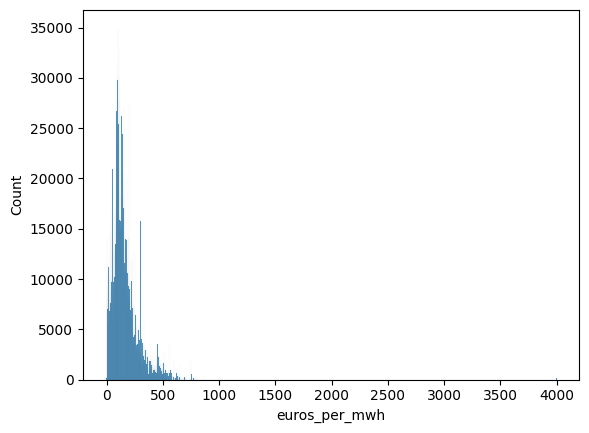

In [0]:
sns.histplot(data = dfpd, x="euros_per_mwh")

In [0]:
# drop row with euros_per_mwh > 1000 
dfpd = dfpd[dfpd.euros_per_mwh < 1000]

<Axes: xlabel='euros_per_mwh', ylabel='Count'>

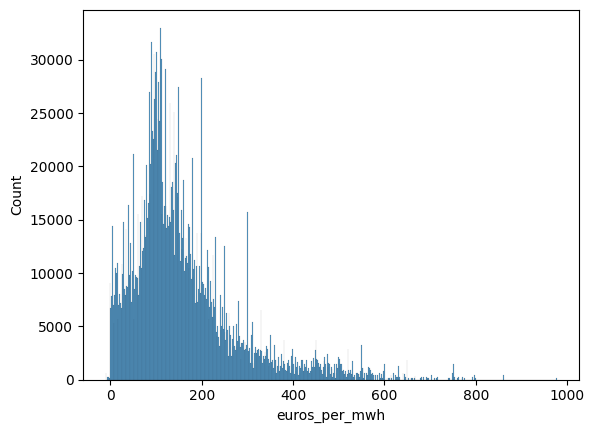

In [0]:
sns.histplot(data = dfpd, x="euros_per_mwh")

## Feature Selection

In [0]:
col_list=dfpd.columns[0:]
col_list

Index(['county_id', 'county_name', 'longitude', 'latitude', 'data_block_id',
       'wh_observ_date', 'wh_observ_4hour', 'wh_temperature', 'wh_dewpoint',
       'wh_snowfall', 'wh_surface_pressure', 'wh_cloudcover_total',
       'wh_cloudcover_low', 'wh_cloudcover_mid', 'wh_cloudcover_high',
       'wh_windspeed_10m', 'wh_winddirection_10m', 'wh_shortwave_radiation',
       'wh_direct_solar_radiation', 'wh_diffuse_radiation', 'wf_temperature',
       'wf_dewpoint', 'wf_cloudcover_total', 'wf_cloudcover_low',
       'wf_cloudcover_mid', 'wf_cloudcover_high',
       'wf_10_metre_u_wind_component', 'wf_10_metre_v_wind_component',
       'wf_direct_solar_radiation', 'wf_surface_solar_radiation_downwards',
       'wf_snowfall', 'wf_total_precipitation', 'is_business',
       'is_consumption', 'product_type_id', 'product_type',
       'installed_capacity', 'eic_count', 'target', 'euros_per_mwh',
       'highest_price_per_mwh', 'lowest_price_per_mwh', 'datetime',
       't_observ_date', 't_ob

/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


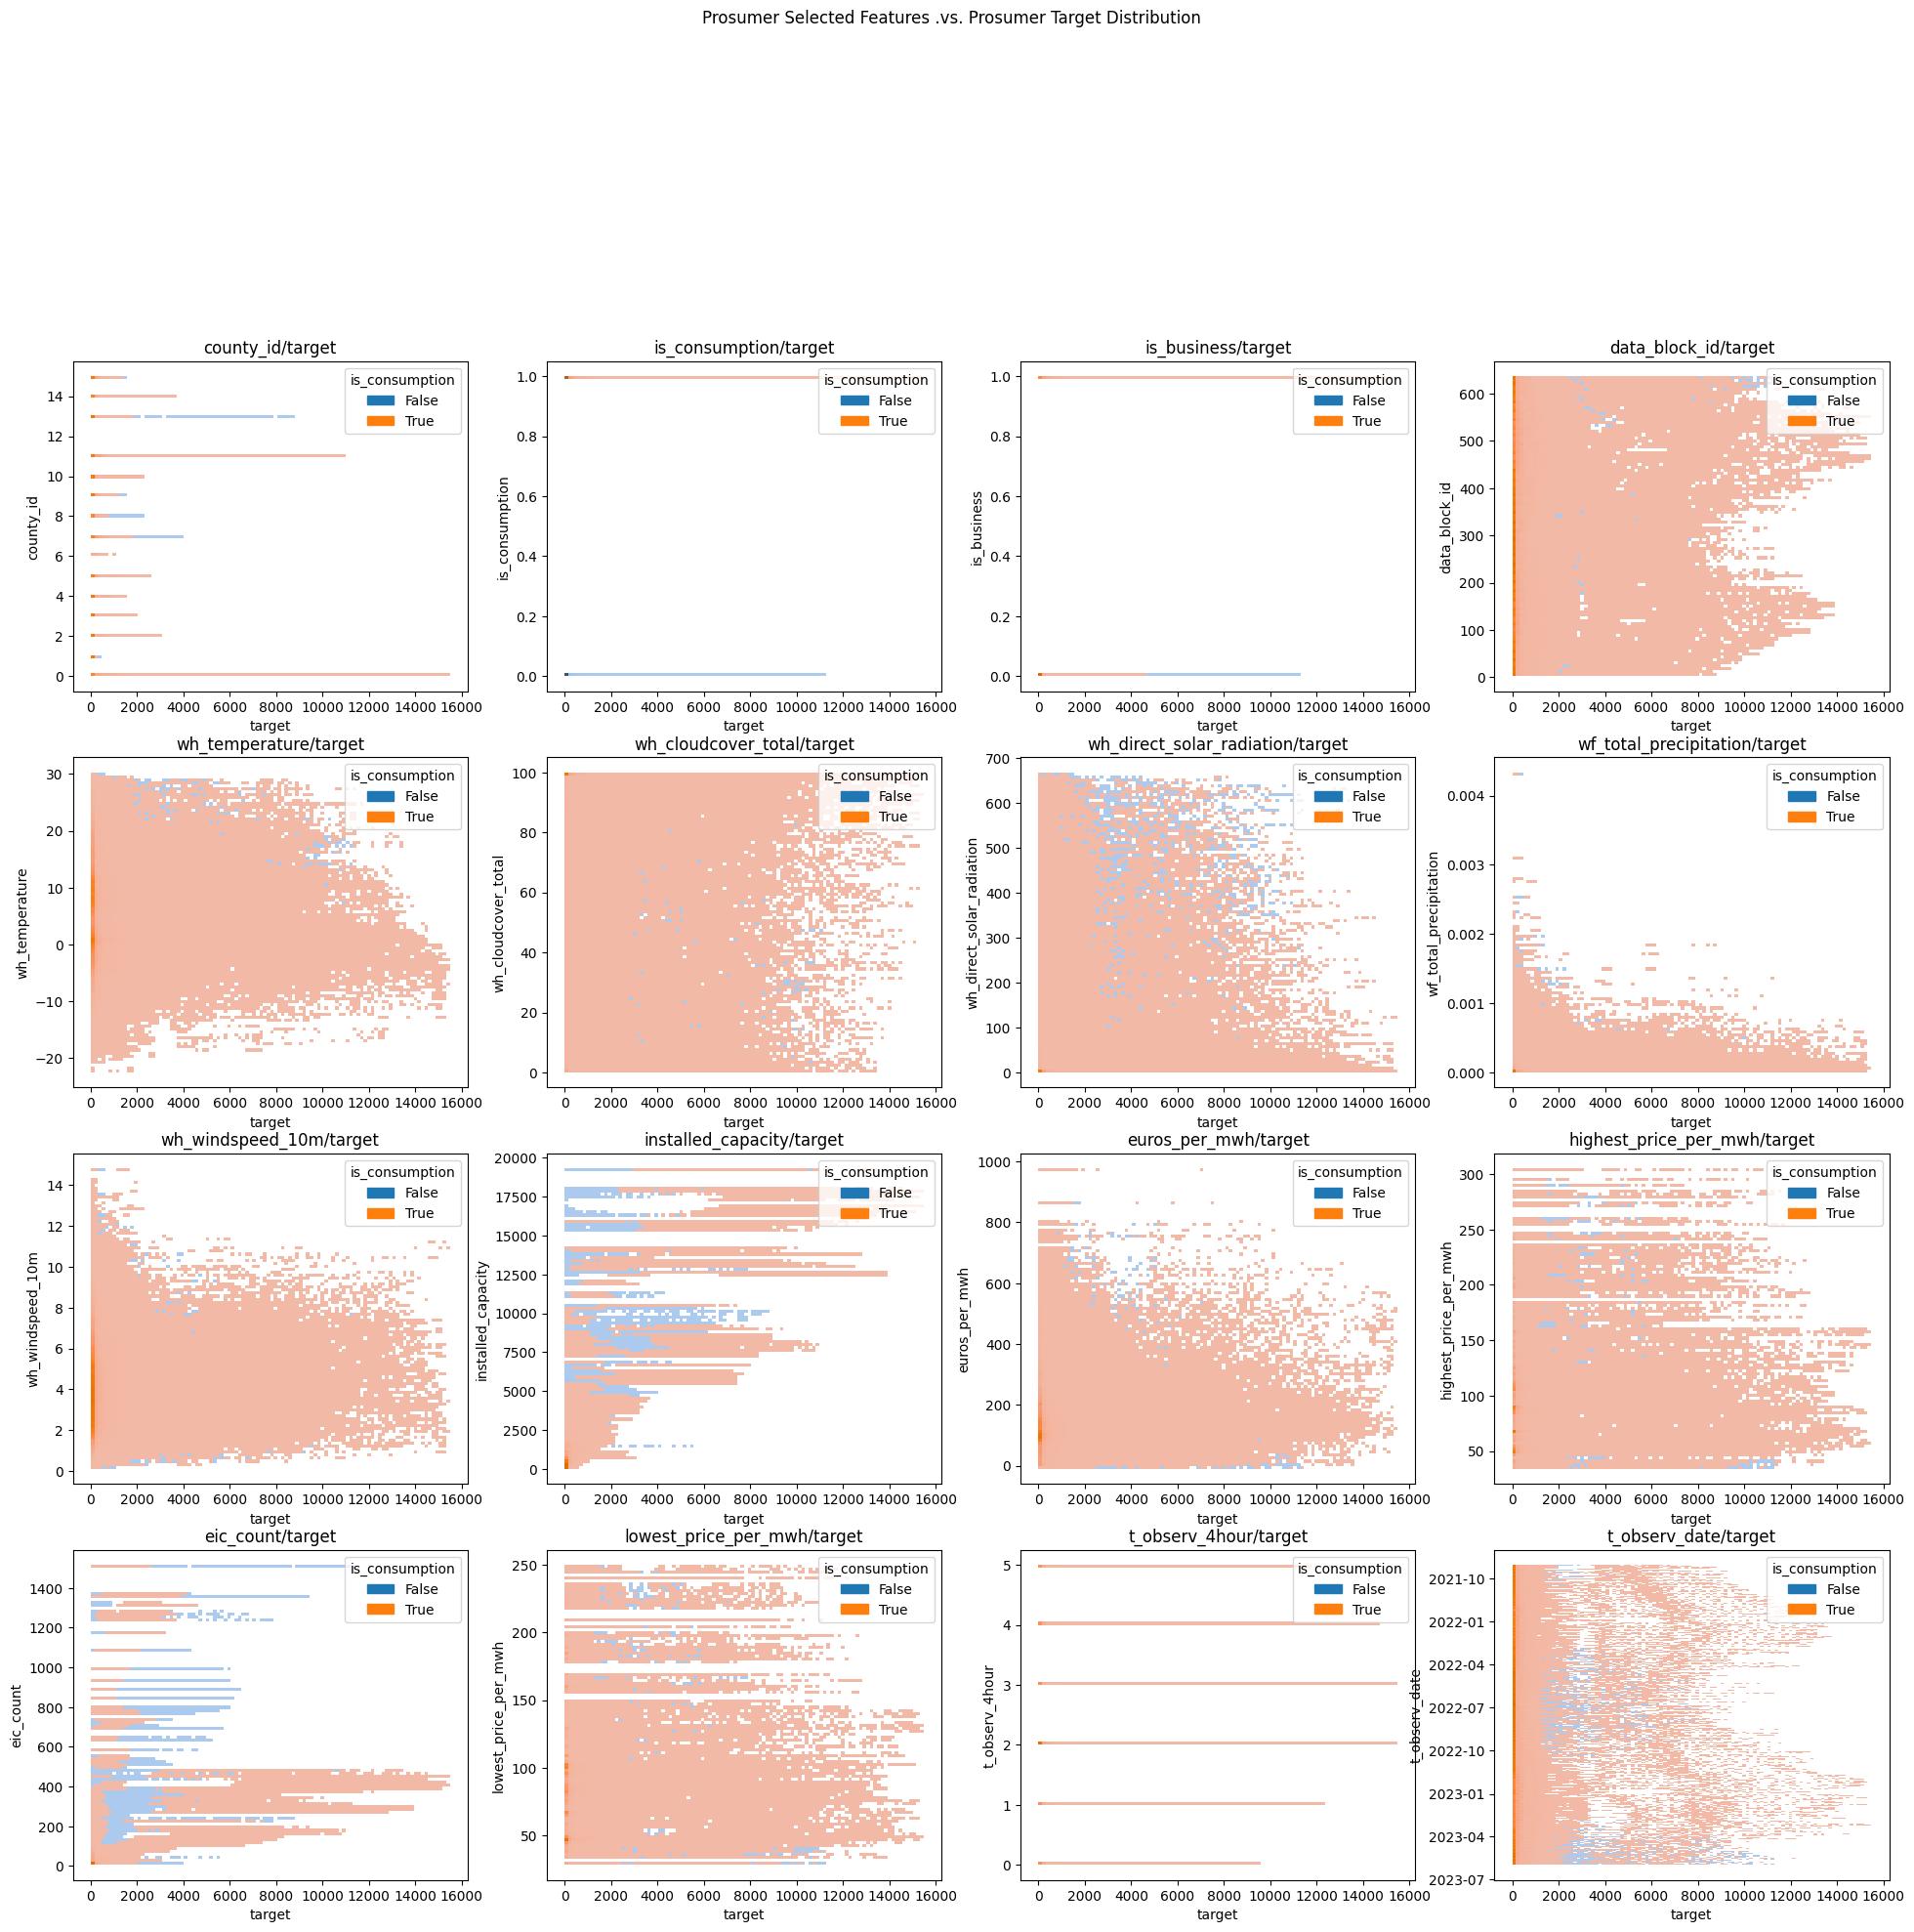

In [0]:
# get the feature names into a list
col_list_final=['county_id','is_consumption', 'is_business', 'data_block_id',  'wh_temperature','wh_cloudcover_total','wh_direct_solar_radiation','wf_total_precipitation','wh_windspeed_10m','installed_capacity','euros_per_mwh','highest_price_per_mwh','eic_count','lowest_price_per_mwh','t_observ_4hour','t_observ_date']
my_plot_cat_num(dfpd, col_list_final, "Prosumer Selected Features")

## Now we only get the subset of features.

In [0]:
### We will only use the data in the col_list as the model input
col_list_final.append("target")
model_df = dfpd[col_list_final]
display(model_df.head(10))

county_id is_consumption is_business data_block_id wh_temperature wh_cloudcover_total wh_direct_solar_radiation wf_total_precipitation wh_windspeed_10m installed_capacity euros_per_mwh highest_price_per_mwh eic_count lowest_price_per_mwh t_observ_4hour t_observ_date target 0 true false 2 14.016666666666667 27.166666666666668 342.8333333333333 4.641626340647539E-5 6.291666666666667 7207.88 118.92 46.29 688 45.62 2 2021-09-03 310.078 0 false false 2 14.312499999999998 35.833333333333336 358.5 1.3905722880735993E-5 6.635416666666667 166.4 97.97 46.29 17 45.62 3 2021-09-03 77.51 0 true true 2 14.312499999999998 35.833333333333336 358.5 1.3905722880735993E-5 6.635416666666667 400.0 105.05 46.29 5 45.62 3 2021-09-03 39.0 0 true false 2 13.391666666666666 48.875 113.66666666666667 1.3729202328249812E-4 6.815972222222222 952.89 138.0 46.29 108 45.62 4 2021-09-03 107.323 0 true true 2 13.391666666666666 48.875 113.66666666666667 1.3729202328249812E-4 6.815972222222222 400.0 158.51 46.29 5 45.62 4 2021-09-03 56.4 0 false true 2 11.216666666666669 34.458333333333336 0.0 1.461842894059373E-4 5.569444444444444 400.0 87.45 46.29 5 45.62 5 2021-09-03 0.0 0 false false 2 10.3125 24.458333333333332 0.0 4.950974410652028E-5 5.649305555555556 166.4 92.25 46.29 17 45.62 0 2021-09-03 0.0 0 false true 2 10.3125 24.458333333333332 0.0 4.950974410652028E-5 5.649305555555556 1411.0 96.99 46.29 43 45.62 0 2021-09-03 0.0 0 true false 2 9.970833333333333 6.75 14.208333333333334 1.9654275092761964E-5 4.976851851851852 952.89 128.94 46.29 108 45.62 1 2021-09-03 109.17 0 true true 2 9.970833333333333 6.75 14.208333333333334 1.9654275092761964E-5 4.976851851851852 400.0 98.62 46.29 5 45.62 1 2021-09-03 76.8

In [0]:
label_counts = model_df.is_business.value_counts()
business = model_df[dfpd.is_business == 1].shape[0]
consumer = model_df[dfpd.is_business == 0].shape[0]
total = business + consumer
print("Business: {0} ({1:.4f}%)".format(business, business / total * 100))
print("Consumer: {0} ({1:.4f}%)".format(consumer, consumer / total * 100))

Business: 1222212 (52.9552%)
Consumer: 1085800 (47.0448%)


In [0]:
label_counts = model_df.is_consumption.value_counts()
consumption = model_df[model_df.is_consumption == 1].shape[0]
production = model_df[model_df.is_consumption == 0].shape[0]
total = production + consumption
print("consumption: {0} ({1:.4f}%)".format(consumption, consumption / total * 100))
print("production: {0} ({1:.4f}%)".format(production, production / total * 100))

consumption: 1154006 (50.0000%)
production: 1154006 (50.0000%)


### Here are the features for our model

In [0]:
col_list_final

['county_id',
 'is_consumption',
 'is_business',
 'data_block_id',
 'wh_temperature',
 'wh_cloudcover_total',
 'wh_direct_solar_radiation',
 'wf_total_precipitation',
 'wh_windspeed_10m',
 'installed_capacity',
 'euros_per_mwh',
 'highest_price_per_mwh',
 'eic_count',
 'lowest_price_per_mwh',
 't_observ_4hour',
 't_observ_date',
 'target']